In [ ]:
%matplotlib widget
import pylab as plt
from labdata.schema import *

plt.matplotlib.rcParams['pdf.fonttype'] = 42
plt.matplotlib.rcParams['ps.fonttype'] = 42
savepath = Path('../../figures/figure1')


In [36]:
UnitCount.populate(processes = 12, display_progress = True)

Processes:   0%|                                                                                                                                                                              | 0/64 [00:00<?, ?it/s][2024-05-28 22:35:43,442][INFO]: Connecting admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-05-28 22:35:43,442][INFO]: Connecting admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-05-28 22:35:43,442][INFO]: Connecting admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-05-28 22:35:43,442][INFO]: Connecting admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-05-28 22:35:43,442][INFO]: Connecting admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-05-28 22:35:43,442][INFO]: Connecting admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[2024-05-28 22:35:43,442][INFO]: Connecting admin@churchland-data.cmojfwfr0b9t.us-west-2.rds.amazonaws.com:3306
[20

In [ ]:
subject = 'JC131'
q_task = (Dataset() & f'subject_name = "{subject}"' & 'dataset_name LIKE "%Droplets%"').fetch('subject_name','session_name',as_dict = True)

rec_task = pd.DataFrame((Session*UnitCount*EphysRecording.ProbeSetting & q_task &
     "parameter_set_num = 5" & 'unit_criteria_id = 1' & 'configuration_id = 3').fetch())
rec_all = pd.DataFrame((Session*UnitCount*EphysRecording.ProbeSetting & f'subject_name = "{subject}"' &
     "parameter_set_num = 5" & 'unit_criteria_id = 1' & 'configuration_id = 3').fetch())

implant_date = np.array((Procedure() & f'subject_name = "{subject}"' & 'procedure_type = "chronic implant"').fetch('procedure_datetime'),dtype = 'datetime64')


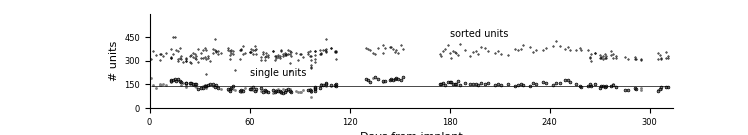

In [37]:
import pylab as plt
fig = plt.figure(figsize = [7.48,1.35])
fig.add_axes([0.2,0.2,0.7,0.7])
days = (rec_all.session_datetime.values - implant_date).astype('timedelta64[D]').astype(int)
plt.plot(days,
         rec_all.sua,'ko',markerfacecolor = 'gray',ms = 2,markeredgewidth = 0)
days = (rec_task.session_datetime.values - implant_date).astype('timedelta64[D]').astype(int)
plt.plot(days,
         rec_task.sua,'ko',markerfacecolor = 'none',ms = 2,markeredgewidth = 0.5)

days = (rec_all.session_datetime.values - implant_date).astype('timedelta64[D]').astype(int)
plt.plot(days,
         rec_all.mua,'ko',markerfacecolor = 'none',ms = 1,markeredgewidth = 0.5)

plt.hlines(np.mean(rec_all.sua.values),days.min(),days.max(),lw = 0.5,color = 'k')

plt.ylim([0,600])
plt.xlim([0,days.max()*1.01])

plt.xticks(np.arange(0,days.max(),60),fontsize = 6)
plt.yticks(np.arange(0,550,150),fontsize = 6)
plt.xlabel('Days from implant',fontsize = 8)
plt.ylabel('# units',fontsize = 8)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.text(60,200,'single units',fontsize = 7)
plt.text(180,450,'sorted units',fontsize = 7);
if not savepath.exists():
    savepath.mkdir(parents = True)
fig.savefig(savepath/f'{subject}_units_longitudinal.pdf')

# Supplementary figure

ValueError: x and y must have same first dimension, but have shapes (148,) and (150,)

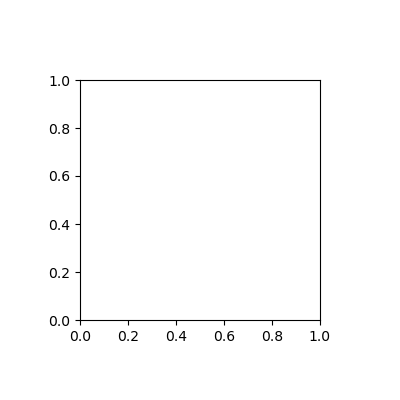

In [38]:

import pylab as plt
from labdata.schema import *
subject = 'JC131'
ms = 2
q_task = (Dataset() & f'subject_name = "{subject}"' & 'dataset_name LIKE "%Droplets%"').fetch('subject_name','session_name',as_dict = True)
q_ori = (Dataset() & f'subject_name = "{subject}"' & 'dataset_name LIKE "%ori%"').fetch('subject_name','session_name',as_dict = True)
# UnitCount().populate(display_progress = True,processes = 10)
implant_date = np.array((Procedure() & f'subject_name = "{subject}"' & 'procedure_type = "chronic implant"').fetch('procedure_datetime'),dtype = 'datetime64')

parset = 4
ucount = 1
df = (Session()* UnitCount()*EphysRecording.ProbeSetting() &
      q_task & f'parameter_set_num = {parset}' &
      'configuration_id = 3' & f'unit_criteria_id = {ucount}').fetch(format = 'frame')
parset = 5
df2 = (Session()* UnitCount()*EphysRecording.ProbeSetting() & q_task 
       & f'parameter_set_num = {parset}' 
       & 'configuration_id = 3'& f'unit_criteria_id = {ucount}').fetch(format = 'frame')

fig = plt.figure(figsize = [4,4])
fig.add_axes([0.2,0.2,0.6,0.6])
plt.plot(df.sua.values,df2.sua.values,'ko',ms = ms,label = (UnitCountCriteria() & f'unit_criteria_id = {ucount}').fetch('sua_criteria')[0])
plt.xlabel('Kilosort 2.5 sua',fontsize = 16)
plt.ylabel('Kilosort 4.0 sua',fontsize = 16)
plt.axis('square')

ucount = 2
parset = 4
df = (Session()* UnitCount()*EphysRecording.ProbeSetting() & q_task 
      & f'parameter_set_num = {parset}' 
      & 'configuration_id = 3' & f'unit_criteria_id = {ucount}').fetch(format = 'frame')
parset = 5
df2 = (Session()* UnitCount()*EphysRecording.ProbeSetting() & q_task 
       & f'parameter_set_num = {parset}' 
       & 'configuration_id = 3' & f'unit_criteria_id = {ucount}').fetch(format = 'frame')
plt.plot(df.sua.values,df2.sua.values,'ro',ms = ms,alpha = 0.5,label = (UnitCountCriteria() 
                                                                       & f'unit_criteria_id = {ucount}').fetch('sua_criteria')[0])

ucount = 3
parset = 4
df = (Session()* UnitCount()*EphysRecording.ProbeSetting() & q_task 
      & f'parameter_set_num = {parset}' 
      & 'configuration_id = 3' & f'unit_criteria_id = {ucount}').fetch(format = 'frame')
parset = 5
df2 = (Session()* UnitCount()*EphysRecording.ProbeSetting() & q_task 
       & f'parameter_set_num = {parset}' 
       & 'configuration_id = 3' & f'unit_criteria_id = {ucount}').fetch(format = 'frame')
plt.plot(df.sua.values,df2.sua.values,'bo',ms = ms,alpha = 0.5,label = (UnitCountCriteria() 
                                                                       & f'unit_criteria_id = {ucount}').fetch('sua_criteria')[0])

parset = 4
ucount = 4
df = (Session()* UnitCount()*EphysRecording.ProbeSetting() 
      & q_task & f'parameter_set_num = {parset}' 
      & 'configuration_id = 3' & f'unit_criteria_id = {ucount}').fetch(
    format = 'frame')
parset = 5
df2 = (Session()* UnitCount()*EphysRecording.ProbeSetting() 
       & q_task & f'parameter_set_num = {parset}' 
       & 'configuration_id = 3' & f'unit_criteria_id = {ucount}').fetch(format = 'frame')
plt.plot(df.sua.values,df2.sua.values,'co',ms = ms,alpha = 0.5,label = (UnitCountCriteria() &
                                                                       f'unit_criteria_id = {ucount}').fetch('sua_criteria')[0])
plt.axis('square')
plt.plot([0,450],[0,450],'k',lw = 0.5)
print(np.mean(df.sua.values-df2.sua.values))
plt.ylim([50,450])
plt.xlim([50,450])
plt.legend(fontsize = 6, loc = 'upper center',bbox_to_anchor=(0.5, 1.35))
plt.title('Impact of metrics on sorting yield')

if not savepath.exists():
    savepath.mkdir(parents = True)
fig.savefig(savepath/f'{subject}_impact_of_metrics_on_sorting_yield_JC131.pdf');

subject_name unique mouse id,session_name session identifier,dataset_name,probe_num probe number,parameter_set_num number of the parameters set,n_pre_samples to compute the waveform time,n_sorted_units number of sorted units,n_detected_spikes number of detected spikes,sorting_datetime date of the spike sorting analysis,channel_indices channel_map,channel_coords channel_positions,features_file Path to the file,features_storage storage name,waveforms_file Path to the file,waveforms_storage storage name
JC131,20230720_180000,ephys_g0,0,5,45,729,6664275,2024-05-08 00:09:23,=BLOB=,=BLOB=,JC131/20230720_180000/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230720_180000/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230721_181000,ephys_g0,0,5,45,503,2412334,2024-05-25 00:19:16,=BLOB=,=BLOB=,JC131/20230721_181000/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230721_181000/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230722_175900,ephys_g0,0,5,45,508,6350794,2024-05-08 00:11:58,=BLOB=,=BLOB=,JC131/20230722_175900/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230722_175900/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230724_175348,ephys_g0,0,5,45,464,3948137,2024-05-08 00:05:45,=BLOB=,=BLOB=,JC131/20230724_175348/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230724_175348/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230725_211136,ephys_g0,0,5,45,495,4066494,2024-05-08 00:05:40,=BLOB=,=BLOB=,JC131/20230725_211136/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230725_211136/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230726_184457,ephys_g0,0,5,45,449,4176620,2024-05-08 00:06:00,=BLOB=,=BLOB=,JC131/20230726_184457/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230726_184457/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230727_183817,ephys_g0,0,5,45,492,4829929,2024-05-08 00:06:54,=BLOB=,=BLOB=,JC131/20230727_183817/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230727_183817/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230727_190139,ephys_g1,0,5,45,360,2420794,2024-05-08 00:04:02,=BLOB=,=BLOB=,JC131/20230727_190139/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230727_190139/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230728_182219,ephys_g0,0,5,45,481,4764775,2024-05-08 00:06:55,=BLOB=,=BLOB=,JC131/20230728_182219/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230728_182219/spike_sorting/imec0/5/waveforms.hdf5,analysis
JC131,20230730_195709,ephys_g0,0,5,45,496,4830844,2024-05-08 00:06:55,=BLOB=,=BLOB=,JC131/20230730_195709/spike_sorting/imec0/5/features.hdf5,analysis,JC131/20230730_195709/spike_sorting/imec0/5/waveforms.hdf5,analysis
